<h1>How Great was The Great One?</h1>
<h3>A deep dive into the game-changing legacy of Wayne Gretzky</h3>
<h5>By Phil Rongo</h5>


<h2>Abstract:</h2>
Wayne Gretzky has been called “The Greatest Hockey Player who Ever Lived” by fans, coaches, fellow NHL players, and even the NHL itself. In this notebook, we venture to quantify visually just how dominant The Great One truly was - across almost all facets of the game. We will visualize offensive, defensive, and liability aspects of Gretzky's game and compare his achievements and statistics against not only the stars of today, but against other all time greats as well. 

Raw data for this project was gathered from the **Hockey Reference** website (https://www.hockey-reference.com/), however some datasets - such as career_stats_greats.csv - were manually spliced together from multiple pages on their website.



<h2>Data PreProcessing</h2>

First, we will preprocess our data. We'll start by loading our three separate datasets into dataframes. These datasets will encompass:

- Total career stats of all-time greats and current NHL stars
- Stats for all players during the 1986-1987 season - a season often held to be Gretzky's best
- Stats for all players during the 2022-2023 season - a recent season of intense competition

All of these dataframes include the same information - with the exception of TOI (time on ice), which was not recorded until 1997. As such, 1986-1987 is missing the stat entirely, and players in the all-time-greats dataset will only have the statistic for seasons played after 1996.


In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

greats_df = pd.read_csv("./data/career_stats_greats.csv")
szn_87_df = pd.read_csv("./data/allplayers_86_87_szn.csv")
szn_23_df = pd.read_csv("./data/allplayers_22_23_szn.csv")
szn_23_df

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,-9999
0,1,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,2,0.0,18,8:59,0,1,0,0,NaN,abruzni01
1,2,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,102,13.7,1102,14:19,81,244,337,289,53.8,acciano01
2,2,Noel Acciari,31.0,STL,C,54,10,8,18,-6,...,74,13.5,787,14:35,55,168,275,239,53.5,acciano01
3,2,Noel Acciari,31.0,TOR,C,23,4,1,5,2,...,28,14.3,315,13:41,26,76,62,50,55.4,acciano01
4,3,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,77,3.9,999,16:07,38,19,0,0,NaN,addisca01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,948,Radim Zohorna,26.0,CGY,F,8,0,0,0,-2,...,3,0.0,67,8:25,1,5,21,18,53.8,zohorra01
1139,948,Radim Zohorna,26.0,TOR,F,2,1,0,1,1,...,6,16.7,18,9:12,1,2,0,2,0.0,zohorra01
1140,949,Artem Zub,27.0,OTT,D,53,3,7,10,2,...,41,7.3,1073,20:15,67,131,0,0,NaN,zubar01
1141,950,Mats Zuccarello,35.0,MIN,LW,78,22,45,67,-3,...,198,11.1,1575,20:12,51,51,24,36,40.0,zuccama01


Next, we will drop all duplicated records in the respective season dataframes. When a player is traded mid-season, separate entries are posted for each individual team. The player is also given a "TOT" entry, which is team-independent stats for the entire season. We will be keeping this statistic for traded players. Since this statistic appears first when sorting by player name (with their individual team stats following) we will simply keep the first entry for these players.

In [2]:
szn_23_df.drop_duplicates(subset="Player", keep="first", inplace=True)
szn_87_df.drop_duplicates(subset="Player", keep="first", inplace=True)


Calling .info() on this dataset shows that there are some missing (null) values for some columns. Many of these columns are position specific (goalies will not have shot percentages, skaters will not have save percentage), so we will only impute the Age column. 

In [3]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy="most_frequent")
szn_23_df['Age']= mode_imputer.fit_transform(szn_23_df[['Age']])
szn_87_df['Age']=mode_imputer.fit_transform(szn_87_df[['Age']])
szn_23_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 1142
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      950 non-null    int64  
 1   Player  950 non-null    object 
 2   Age     950 non-null    float64
 3   Tm      950 non-null    object 
 4   Pos     950 non-null    object 
 5   GP      950 non-null    int64  
 6   G       950 non-null    int64  
 7   A       950 non-null    int64  
 8   PTS     950 non-null    int64  
 9   +/-     950 non-null    int64  
 10  PIM     950 non-null    int64  
 11  PS      950 non-null    float64
 12  EV      950 non-null    int64  
 13  PP      950 non-null    int64  
 14  SH      950 non-null    int64  
 15  GW      950 non-null    int64  
 16  EV.1    950 non-null    int64  
 17  PP.1    950 non-null    int64  
 18  SH.1    950 non-null    int64  
 19  S       950 non-null    int64  
 20  S%      922 non-null    float64
 21  TOI     950 non-null    int64  
 22  ATOI  

Next, we will remove defensemen and goalies from the dataframe. It would not be fair to compare them to Gretzky, because they serve different purposes as part of the team. Since Gretzky was a Center, it is most correct to compare him to other Centers, however to be completely thorough, we will compare him to all offensive players on a team -- Center, Right Wing, and Left Wing. 

In addition, we will drop the columns "-9999" and "S%" in all dataframes, since these are (1) autogenerated for awards and (2) redundant since we will hand-calculate this value from shots. We will also remove the TOI and ATOI column from the 1987 season dataframe since this data is not available before 1997.

In [4]:
offensive_pos = ["C", "LW", "RW"]
szn_23_df = szn_23_df[szn_23_df['Pos'].isin(offensive_pos)].drop(["S%", "-9999"], axis=1)
szn_87_df = szn_87_df[szn_87_df['Pos'].isin(offensive_pos)].drop(['S%', "TOI","ATOI", "-9999"], axis=1)

szn_87_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 783
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      437 non-null    int64  
 1   Player  437 non-null    object 
 2   Age     437 non-null    int64  
 3   Tm      437 non-null    object 
 4   Pos     437 non-null    object 
 5   GP      437 non-null    int64  
 6   G       437 non-null    int64  
 7   A       437 non-null    int64  
 8   PTS     437 non-null    int64  
 9   +/-     437 non-null    int64  
 10  PIM     437 non-null    int64  
 11  PS      437 non-null    float64
 12  EV      437 non-null    int64  
 13  PP      437 non-null    int64  
 14  SH      437 non-null    int64  
 15  GW      437 non-null    int64  
 16  EV.1    437 non-null    int64  
 17  PP.1    437 non-null    int64  
 18  SH.1    437 non-null    int64  
 19  S       437 non-null    int64  
dtypes: float64(1), int64(16), object(3)
memory usage: 71.7+ KB


One more thing we will do, since the dataframes are taking a bit of space, is convert all categorical variables to a categorical data type. This are the Team and Pos columns.

In [5]:
szn_23_df['Tm'] = szn_23_df['Tm'].astype("category")
szn_87_df['Tm'] = szn_87_df['Tm'].astype("category")

szn_23_df['Pos'] = szn_23_df['Pos'].astype("category")
szn_87_df['Pos'] = szn_87_df['Pos'].astype("category")

<h2>The 1986-87 Season</h2>

Now let's dive in to the 1986-1987 season. This season is widely considered Gretzky's best season - he had already led his team to win the Stanley Cup twice before in 1984 and 1985 and would go on to do it twice more, once this season (1987) and again in 1988.

But was he really the deciding factor in his team's dominance? His team did not, after all, win every year in a row. How dominant was Gretzky when compared to the other talented professionals of his day?

<h3>Offensive Effectiveness</h3>

In this section we will look at a wide array of offensive metrics for all forwards. These include:

- **Goals: Goals versus Games Played, Goals per Game vs. Games Played**
- **Shooting Accuracy**
- **Assists: Assists versus Games Played, Assists per Game vs. Games Played**
- **Points: Points versus Games Played**

<h4> Goals and Shooting Accuracy</h4>

Gretzky was a dynamo in the offensive end, but was not actually the leading goal scorer of the 86-87 season - a title he lost to Mario Lemieux. However, after diving in to the numbers, Gretzky's dominance becomes readily apparent. 

We will start by creating two plots using Seaborn and Matplotlib - one a simple scatterplot of goals (y-axis) versus games played (x-axis), and another in logscale representing the ratio of goals per game (y-axis) against games played (x-axis). We will create these plots side-by-side using the plt.subplot() method. 

**For the plots that do not display ratios**, I will define a function called plot() which will take in a matplotlib axis and create a scatterplot with regression line. This will be displayed in the subplots figure, but will clean up redundant code and make the notebook easier to understand.

I will also use this code block to define a function that we will use numerous times: get_regression_line(). This function takes in an x and y column and returns points required to plot a regression line against the data. This allows us to visualize if Gretzky was above or below average for a given statistic.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def get_regression_line(col1, col2):
    coeffs = np.polyfit(szn_87_df[col1], szn_87_df[col2], 1)
    slope = coeffs[0]
    #intercept = coeffs[1]
    intercept = 0
    regression_line = (szn_87_df[col1] * slope) + intercept
    return regression_line



def plot(ax, data:pd.DataFrame, x, y, label, title, xlabel, ylabel, alpha=0.5):
    sorted_data = data.sort_values(by=y, ascending=False)
    sns.scatterplot(data, x=x, y=y, alpha=alpha, label=label, ax=ax)
    cmap = plt.get_cmap("Set2")


    for player in range(5):
        if "Wayne Gretzky*" not in sorted_data.iloc[player]["Player"]:
            ax.scatter(sorted_data.iloc[player][x], sorted_data.iloc[player][y], c=cmap(player), label=sorted_data.iloc[player]['Player'],
                    alpha=0.5)
        else:
            ax.scatter(sorted_data.iloc[player][x], sorted_data.iloc[player][y], c="red", label="Wayne Gretzky*",
                    alpha=0.5)
    
    if "Wayne Gretzky*" not in [playername for playername in sorted_data[:5]["Player"]]:
        
        ax.scatter(data[data['Player']=="Wayne Gretzky*"][x], data[data['Player']=="Wayne Gretzky*"][y], c="red", label="Wayne Gretzky*",
                    alpha=0.5)
    ax.plot(data[x], regression_line, color="grey", alpha=0.5)

    ax.legend()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

regression_line = get_regression_line("GP", "G")


['Mike Stevens', 'Trevor Stienburg', 'Ron Talakoski', 'Bill Terry', 'Leigh Verstraete']


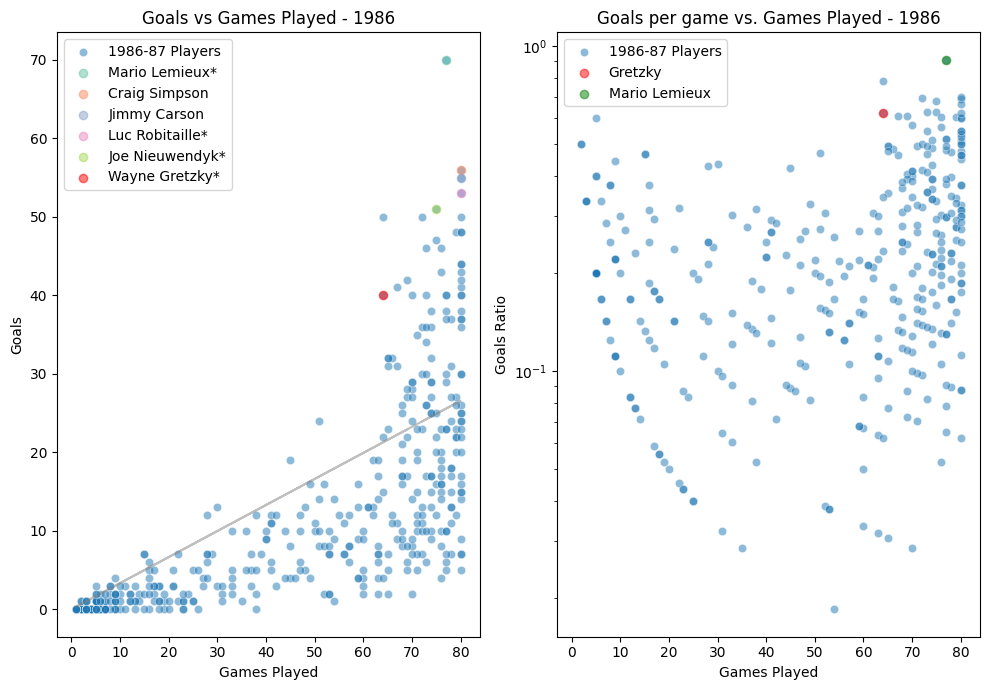

In [7]:

plt.figure(figsize=(10,7))
ax1 = plt.subplot(1,2,1)

ax1 = plot(ax1, szn_87_df, "GP", "G","1986-87 Players", "Goals vs Games Played - 1986", "Games Played", "Goals")

#goals per game
ax2 = plt.subplot(1,2,2)
goals_per_game_ratio = szn_87_df['G']/szn_87_df["GP"]

sns.scatterplot(x=szn_87_df['GP'], y=goals_per_game_ratio, alpha=0.5, label="1986-87 Players", ax=ax2)
ax2.set_yscale("log")
ax2.scatter(szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['GP'], 
            szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['G']/szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['GP'], 
            color="red", alpha=0.5, label='Gretzky')

ax2.scatter(szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['GP'], 
            szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['G']/szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['GP'],
            color="green", alpha=0.5,
            label='Mario Lemieux')
ax2.legend()
ax2.set_title("Goals per game vs. Games Played - 1986")
ax2.set_xlabel("Games Played")
ax2.set_ylabel("Goals Ratio")
plt.tight_layout()




We can see that during this season, Gretzky scored 40 goals in 64 games. However, the expected value of goals scored for a player who played 64 games was a mere 18 - Gretzky had more than doubled expectations.

When comparing on a relative basis to Mario Lemieux, Gretzky appears to lose his star-power, at least for this season. Lemieux, the leading goal-scorer for the season, mustered a very impressive 0.91 goals per game - Gretzky managed 0.625. Still far above average, but something still attainable for "mere mortals". The average goals per game for the season for players with at least 60 games played was 0.30 goals per game.

But what about shooting accuracy? Surely Gretzky, who **still holds the record for most goals ever** must have otherworldly shooting accuracy.

Text(0, 0.5, 'Shooting Accuracy')

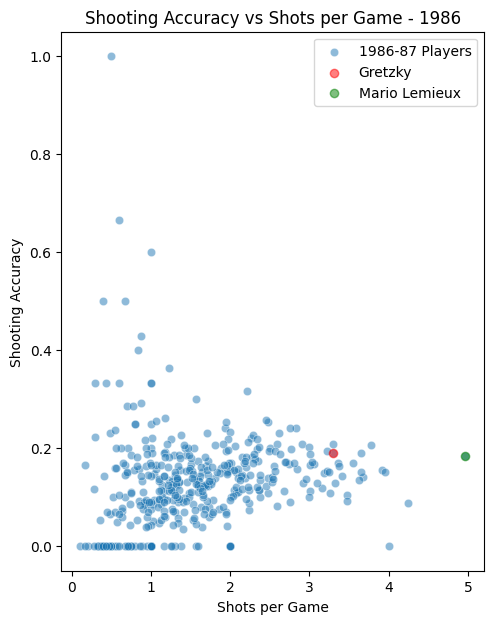

In [8]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.scatterplot(szn_87_df, x=szn_87_df['S']/szn_87_df["GP"], y=szn_87_df['G']/szn_87_df['S'], alpha=0.5, label="1986-87 Players")
plt.scatter(szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['S']/szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['GP'], 
            szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['G']/szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['S'], 
            color="red", alpha=0.5, label='Gretzky')
plt.scatter(szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['S']/szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['GP'], 
            szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['G']/szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['S'], color="green", alpha=0.5,
            label='Mario Lemieux')

plt.legend()
plt.title("Shooting Accuracy vs Shots per Game - 1986")
plt.xlabel("Shots per Game")
plt.ylabel("Shooting Accuracy")

The results of this chart may be surprising. Some people have a shooting accuracy of 100%! Gretzky is averaging near 20% shooting accuracy, tied with Lemieux. However, one thing that is important to note here is the x-axis. Many of the players who are beating Gretzky fire far fewer shots per game on average. This means that their statistic is not as meaningful, a player may have only scored 5 goals in an entire season but achieve a 100% shooting accuracy if all goals were scored on their first shot. 

This is an example of sampling bias - the population of observed shots is not large enough to be representative of the player's true shooting accruacy. The farther right a player is on the x-axis, the more consistent their shooting accruacy accross a larger sample size.

What should be taken away from this chart is that Gretzky is near the top for all players with similar shots-per-game statistics. Another thing that is very impressive, Lemieux achieved the same shooting accruacy, but out-shot gretzky on a per-game ratio of 1.5-1!

<h4>Assists</h4>

Perhaps the most astounding part of the Gretzky legend is that he is credited with more assists alone than any other player is credited with total points. 

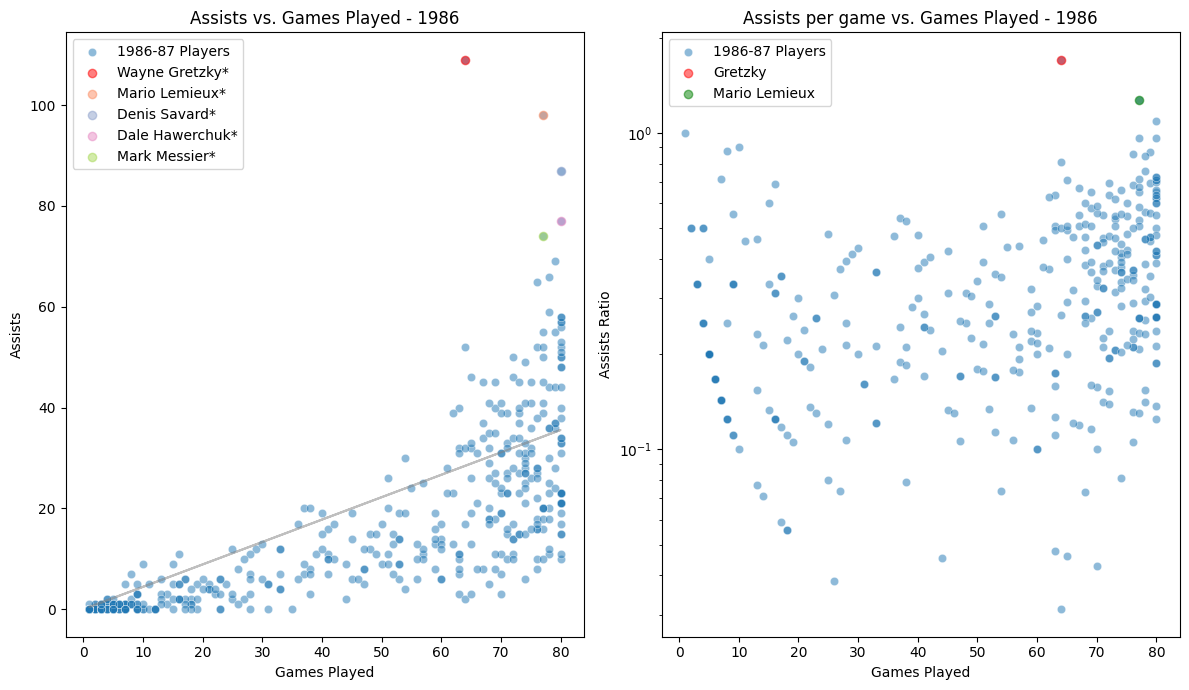

In [9]:
regression_line = get_regression_line("GP", "A")
#assists vs games played
plt.figure(figsize=(12,7))
ax1 = plt.subplot(1,2,1)
ax1 = plot(ax1, szn_87_df,"GP", "A", "1986-87 Players", "Assists vs. Games Played - 1986", "Games Played", "Assists")

#assists per game
plt.subplot(1,2,2)
assists_per_game_ratio = szn_87_df['A']/szn_87_df["GP"]

sns.scatterplot(x=szn_87_df['GP'], y=assists_per_game_ratio, alpha=0.5, label="1986-87 Players")
plt.yscale("log")
plt.scatter(szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['GP'], 
            szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['A']/szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['GP'], 
            color="red", alpha=0.5, label='Gretzky')
plt.scatter(szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['GP'], 
            szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['A']/szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['GP'],
            color="green", alpha=0.5,
            label='Mario Lemieux')
plt.legend()
plt.title("Assists per game vs. Games Played - 1986")
plt.xlabel("Games Played")
plt.ylabel("Assists Ratio")
plt.tight_layout()

Averaging an assists-per-game ratio of 1.7, Gretzky was the dominant playmaker of the 1986-87 season. Lemieux, who played almost 20 more games than Gretzky during the season, scored only 98 assists to Gretzky's 109. This trend of team playmaking would later become ubiquitous with Gretzky's career, as even to this day he still holds more assists than any other player holds total points.

For our last **Offensive Effectiveness** metric, we will take a look at how many points Gretzky, Lemieux, and their peers would score during the season.

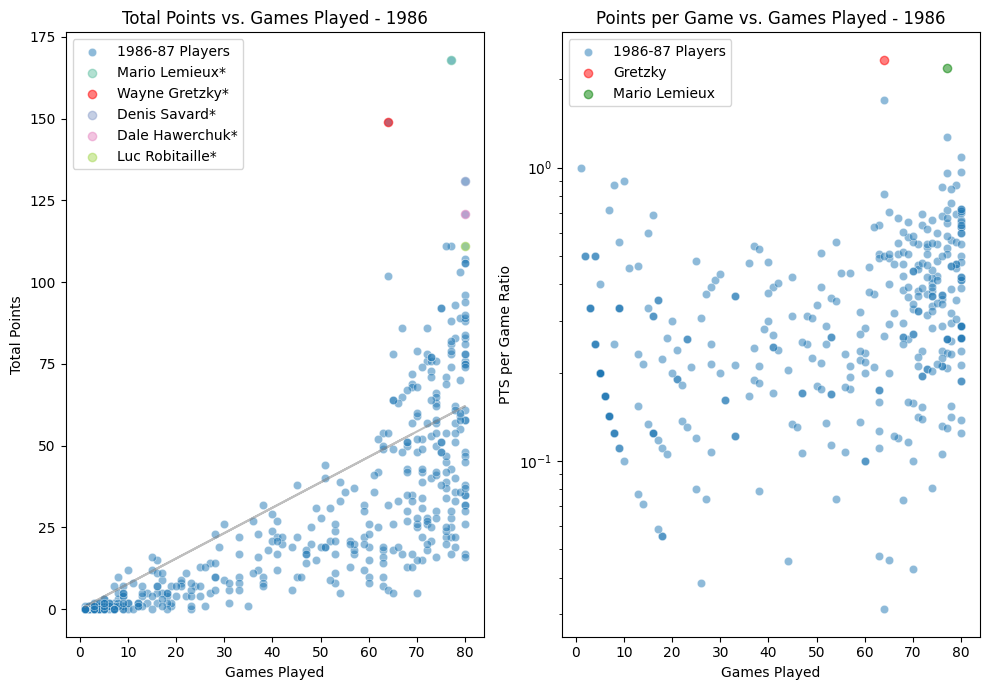

In [11]:
regression_line = get_regression_line("GP", "PTS")
plt.figure(figsize=(10,7))
ax = plt.subplot(1,2,1)
ax = plot(ax, szn_87_df, "GP", "PTS", "1986-87 Players", "Total Points vs. Games Played - 1986", "Games Played", "Total Points")

plt.subplot(1,2,2)
points_per_game_ratio = szn_87_df['PTS']/szn_87_df["GP"]

sns.scatterplot(x=szn_87_df['GP'], y=assists_per_game_ratio, alpha=0.5, label="1986-87 Players")
plt.yscale("log")
plt.scatter(szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['GP'], 
            szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['PTS']/szn_87_df[szn_87_df['Player']=="Wayne Gretzky*"]['GP'], 
            color="red", alpha=0.5, label='Gretzky')
plt.scatter(szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['GP'], 
            szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['PTS']/szn_87_df[szn_87_df['Player']=="Mario Lemieux*"]['GP'],
            color="green", alpha=0.5,
            label='Mario Lemieux')
plt.legend()
plt.title("Points per Game vs. Games Played - 1986")
plt.xlabel("Games Played")
plt.ylabel("PTS per Game Ratio")
plt.tight_layout()

On a per-game basis, Gretzky even outshines Lemieux when it comes to total points. This may be surprising to some because we had determined that Lemieux was the more effective goal-scorer and shot-taker for this season. However, in Hockey, assists and goals both count for one point. Gretzky's astounding playmaking abilities allowed him to overtake all others on a points-per-game basis. 

One thing I find quite intriguing is just how many players are "below average" by offensive metrics. The vast majority of players fall beneath our regression line for the 86-87 season, meaning players like Gretzky and Lemieux, among other outliers, greatly distort the average. We will soon compare these findings to the 2022-23 season, as well as results among all-time stars, to see if they follow a similar distribution. For now however, we will move on to measuring the defensive effectiveness of Gretzky amongst his peers.

<h3>Defensive Effectiveness</h3>

Though Gretzky's position was primarily offensive, all members of the team must be part of the defensive effort when the puck is in their own zone. 

To measure defensive effectiveness, we will analyze players Plus/Minus score on a per-game basis. 

*What is plus/minus?*

Plus/Minus points are awarded to every player on the ice when a goal is scored.

If Team A scores a goal, every player on the ice for team A recieves +1 point, while every player on Team B recieves -1 point. The inverse is also true - if Team B scores, on-ice Team B players recieve +1, on-ice Team A players -1.

If a player ends a game with a positive score, they were effective offensively *and* defensively, as they disproportionately contributed to goals-for, rather than goals-against.

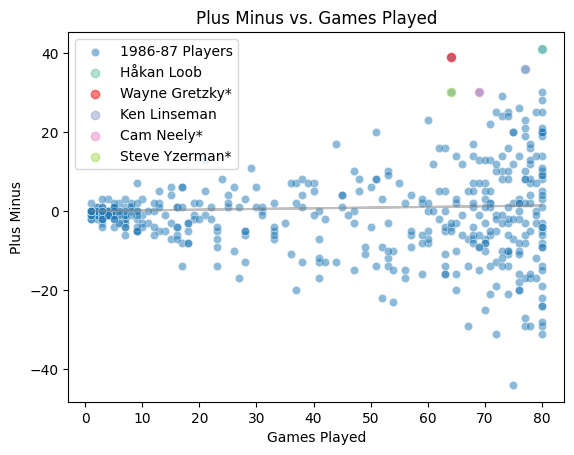

In [12]:
regression_line = get_regression_line("GP", "+/-")
ax = plt.subplot(1,1,1)
ax = plot(ax, szn_87_df, "GP", "+/-", "1986-87 Players", "Plus Minus vs. Games Played", 'Games Played', "Plus Minus")


In [14]:
x = szn_87_df.sort_values(by="+/-")
x.iloc[-1]

Rk               362
Player    Håkan Loob
Age               27
Tm               CGY
Pos               RW
GP                80
G                 50
A                 56
PTS              106
+/-               41
PIM               47
PS              10.1
EV                33
PP                 9
SH                 8
GW                 4
EV.1              25
PP.1              26
SH.1               5
S                198
Name: 431, dtype: object

Gretzky's efficiency both offensively and defensively comes to light after analyzing his Plus/Minus record. Outpacing even Lemieux by a large margin, Gretzky was credited with far more Plus/Minus points than any other player with similar games played. In fact, only one player - Hakan Loob - beat him with total plus minus points, but only managed the feat after playing 20 more games than Gretzky.

<h3>Team Liability</h3>

Finally, a player can be considered a liability to their team if they take penalties. Penalties, especially at when behind, are a great liability to a team and can greatly impact the game's outcome. 

This is because in hockey, when a minor penalty is taken, the at-fault team must play short-handed.

Hockey is usually 5-on-5, but when a minor penalty is committed, can become 5-on-4. If a team commits two minor penalties within a two-minute period, the game can even become 5-on-3. This results in what is called a `power-play` for the team that did not commit the penalty, and a `penalty-kill` for the team that did commit it.

Numerous games have been won and lost because of a power-play goal. Keeping penalty-kills to an absolute minimum is key to winning games and scoring points, therefore, an important metric for teams to track when recruiting players.



['Randy Bucyk', 'Bill Terry', 'Alfie Turcotte', 'Claude Vilgrain', 'Brad Aitken']


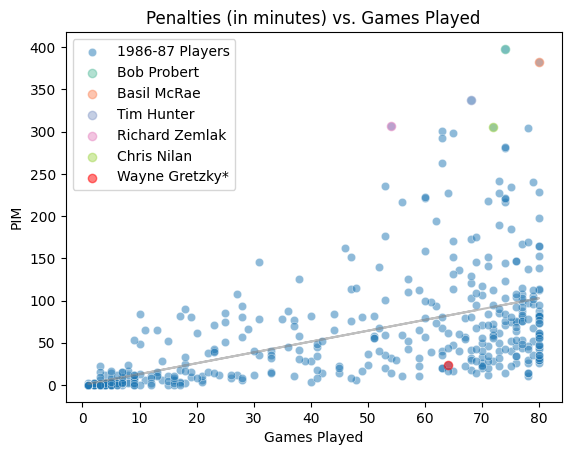

In [15]:
regression_line = get_regression_line("GP", "PIM")
ax = plt.subplot(1,1,1)
ax = plot(ax, szn_87_df, "GP", "PIM", "1986-87 Players", "Penalties (in minutes) vs. Games Played", 'Games Played', "PIM")